In [3]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [36]:
cols_3pt = ['player', 'pos', 'age', 'team_id', 'g', 'mp', 'fg3_per_poss', 'fg3a_per_poss', 'fg3_pct', 
       'ft_per_poss', 'fta_per_poss', 'ft_pct', 'off_rtg']

cols_st = ['player', 'pos', 'age', 'team_id', 'pct_ast_fg3']

In [44]:
def scrape(link, cols):
    res = requests.get(link)
    soup = BeautifulSoup(res.content, 'lxml')
    tables = soup.findAll('tbody')
    rows = tables[0].findAll('tr')
    table = dict()
    
    for curElem in rows:
        if (curElem.find('th', {'scope': 'row'}) != None):
            for curr in cols:
                k = curElem.find('td', {'data-stat': curr})
                text = k.text.strip().encode()
                pretty_text = text.decode('utf-8')
                if pretty_text == '':
                    pretty_text = '0'
                if (curr != 'player') and (curr != 'pos') and (curr != 'team_id'): 
                    pretty_text = float(pretty_text)
                if curr in table:
                    table[curr].append(pretty_text)
                else:
                    table[curr] = [pretty_text]
                    
    player = pd.DataFrame(table)
    return player

In [45]:
base = 'https://www.basketball-reference.com/leagues/NBA_2021_'
data = str(input('Please enter data: '))
url = base + data + '.html'

Please enter data: per_poss


In [46]:
df_poss = scrape(url, cols_3pt)

In [47]:
df_poss

,player,pos,age,team_id,g,mp,fg3_per_poss,fg3a_per_poss,fg3_pct,ft_per_poss,fta_per_poss,ft_pct,off_rtg
0,Precious Achiuwa,PF,21.0,MIA,61.0,737.0,0.0,0.1,0.000,3.8,7.4,0.509,107.0
1,Jaylen Adams,PG,24.0,MIL,7.0,18.0,0.0,5.2,0.000,0.0,0.0,0.000,45.0
2,Steven Adams,C,27.0,NOP,58.0,1605.0,0.0,0.1,0.000,1.8,4.0,0.444,122.0
3,Bam Adebayo,C,23.0,MIA,64.0,2143.0,0.0,0.2,0.250,6.6,8.2,0.799,122.0
4,LaMarcus Aldridge,C,35.0,TOT,26.0,674.0,2.2,5.8,0.388,2.9,3.4,0.872,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright,PG,28.0,SAC,27.0,696.0,2.3,5.7,0.398,2.1,2.5,0.833,115.0
701,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,0.4,1.3,0.267,2.1,3.3,0.628,116.0
702,Trae Young,PG,22.0,ATL,63.0,2125.0,3.1,9.2,0.343,11.2,12.6,0.886,117.0
703,Cody Zeller,C,28.0,CHO,48.0,1005.0,0.2,1.4,0.143,4.1,5.8,0.714,123.0


In [48]:
base = 'https://www.basketball-reference.com/leagues/NBA_2021_'
data = str(input('Please enter data: '))
url = base + data + '.html'

Please enter data: shooting


In [49]:
df_shoot = scrape(url, cols_st)

In [50]:
df_shoot

,player,pos,age,team_id,pct_ast_fg3
0,Precious Achiuwa,PF,21.0,MIA,0.000
1,Jaylen Adams,PG,24.0,MIL,0.000
2,Steven Adams,C,27.0,NOP,0.000
3,Bam Adebayo,C,23.0,MIA,1.000
4,LaMarcus Aldridge,C,35.0,TOT,0.968
...,...,...,...,...,...
700,Delon Wright,PG,28.0,SAC,0.727
701,Thaddeus Young,PF,32.0,CHI,1.000
702,Trae Young,PG,22.0,ATL,0.287
703,Cody Zeller,C,28.0,CHO,1.000


In [51]:
df_poss['3-pt assisted'] = df_shoot.pct_ast_fg3.tolist()

In [53]:
df_poss.isna().sum()

player           0
pos              0
age              0
team_id          0
g                0
mp               0
fg3_per_poss     0
fg3a_per_poss    0
fg3_pct          0
ft_per_poss      0
fta_per_poss     0
ft_pct           0
off_rtg          0
3-pt assisted    0
dtype: int64

In [54]:
df_poss.columns

Index(['player', 'pos', 'age', 'team_id', 'g', 'mp', 'fg3_per_poss',
       'fg3a_per_poss', 'fg3_pct', 'ft_per_poss', 'fta_per_poss', 'ft_pct',
       'off_rtg', '3-pt assisted'],
      dtype='object')

In [99]:
df_poss.pos.unique()

array(['PF', 'PG', 'C', 'SG', 'SF', 'SF-PF', 'SG-SF', 'SF-SG', 'PF-C',
       'SG-PG', 'PG-SG', 'PF-SF', 'C-PF'], dtype=object)

In [221]:
df = df_poss[(df_poss['mp'] >= 800) &(df_poss['pos'].isin(['C', 'PF-C', 'C-PF'])==False) &(df_poss['g'] > 24)].reset_index(drop=True)

In [222]:
len(df_poss)

705

In [223]:
len(df)

257

In [224]:
lakers_new = ['Kent Bazemore', 'Malik Monk', 'Kendrick Nunn', 'Wayne Ellington', 'Trevor Ariza', 'Russell Westbrook',
             'Carmelo Anthony']
lakers_old = ['Alex Caruso', 'Dennis Schröder', 'Wesley Matthews', 'Kyle Kuzma', 'Kentavious Caldwell-Pope', 
              'Markieff Morris', 'Talen Horton-Tucker']

i = 0
for curr in df['player']:
    if (curr in lakers_new) or (curr in lakers_old):
        i = i + 1
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [225]:
df

,player,pos,age,team_id,g,mp,fg3_per_poss,fg3a_per_poss,fg3_pct,ft_per_poss,fta_per_poss,ft_pct,off_rtg,3-pt assisted
0,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,1007.0,3.6,10.4,0.347,2.3,3.1,0.727,101.0,0.921
1,Grayson Allen,SG,25.0,MEM,50.0,1259.0,4.1,10.4,0.391,3.0,3.5,0.868,116.0,0.907
2,Kyle Anderson,PF,27.0,MEM,69.0,1887.0,2.4,6.6,0.360,3.6,4.7,0.783,118.0,0.862
3,Giannis Antetokounmpo,PF,26.0,MIL,61.0,2013.0,1.6,5.2,0.303,9.3,13.6,0.685,122.0,0.299
4,Carmelo Anthony,PF,36.0,POR,69.0,1690.0,3.8,9.4,0.409,4.0,4.4,0.890,112.0,0.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Zion Williamson,PF,20.0,NOP,61.0,2026.0,0.2,0.8,0.294,8.7,12.5,0.698,124.0,1.000
253,Delon Wright,SG-PG,28.0,TOT,63.0,1748.0,1.8,4.8,0.372,2.8,3.5,0.802,118.0,0.781
254,Delon Wright,SG,28.0,DET,36.0,1052.0,1.4,4.1,0.348,3.3,4.2,0.789,119.0,0.839
255,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,0.4,1.3,0.267,2.1,3.3,0.628,116.0,1.000


In [226]:
# volume of 3 pt shots : x
# accuracy: y
# gradient: assisted

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player         257 non-null    object 
 1   pos            257 non-null    object 
 2   age            257 non-null    float64
 3   team_id        257 non-null    object 
 4   g              257 non-null    float64
 5   mp             257 non-null    float64
 6   fg3_per_poss   257 non-null    float64
 7   fg3a_per_poss  257 non-null    float64
 8   fg3_pct        257 non-null    float64
 9   ft_per_poss    257 non-null    float64
 10  fta_per_poss   257 non-null    float64
 11  ft_pct         257 non-null    float64
 12  off_rtg        257 non-null    float64
 13  3-pt assisted  257 non-null    float64
dtypes: float64(11), object(3)
memory usage: 28.2+ KB


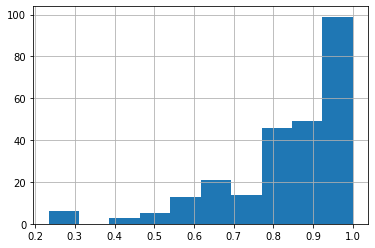

In [323]:
df['3-pt assisted'].hist()

In [352]:
def cat(curr):
    k = 0
    if curr < 0.3:
        k = 30
    elif curr > 0.3 and curr < 0.55:
        k = 60
    elif curr > 0.55 and curr < 0.8:
        k = 90
    elif curr > 0.8:
        k = 120
    return k

In [353]:
df['assisted 3s'] = df['3-pt assisted'].apply(lambda x: cat(x))

In [354]:
df

,player,pos,age,team_id,g,mp,fg3_per_poss,fg3a_per_poss,fg3_pct,ft_per_poss,fta_per_poss,ft_pct,off_rtg,3-pt assisted,assisted 3s
0,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,1007.0,3.6,10.4,0.347,2.3,3.1,0.727,101.0,0.921,120
1,Grayson Allen,SG,25.0,MEM,50.0,1259.0,4.1,10.4,0.391,3.0,3.5,0.868,116.0,0.907,120
2,Kyle Anderson,PF,27.0,MEM,69.0,1887.0,2.4,6.6,0.360,3.6,4.7,0.783,118.0,0.862,120
3,Giannis Antetokounmpo,PF,26.0,MIL,61.0,2013.0,1.6,5.2,0.303,9.3,13.6,0.685,122.0,0.299,30
4,Carmelo Anthony,PF,36.0,POR,69.0,1690.0,3.8,9.4,0.409,4.0,4.4,0.890,112.0,0.782,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Zion Williamson,PF,20.0,NOP,61.0,2026.0,0.2,0.8,0.294,8.7,12.5,0.698,124.0,1.000,120
253,Delon Wright,SG-PG,28.0,TOT,63.0,1748.0,1.8,4.8,0.372,2.8,3.5,0.802,118.0,0.781,90
254,Delon Wright,SG,28.0,DET,36.0,1052.0,1.4,4.1,0.348,3.3,4.2,0.789,119.0,0.839,120
255,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,0.4,1.3,0.267,2.1,3.3,0.628,116.0,1.000,120


In [355]:
df = df[df.player != 'Tristan Thompson']

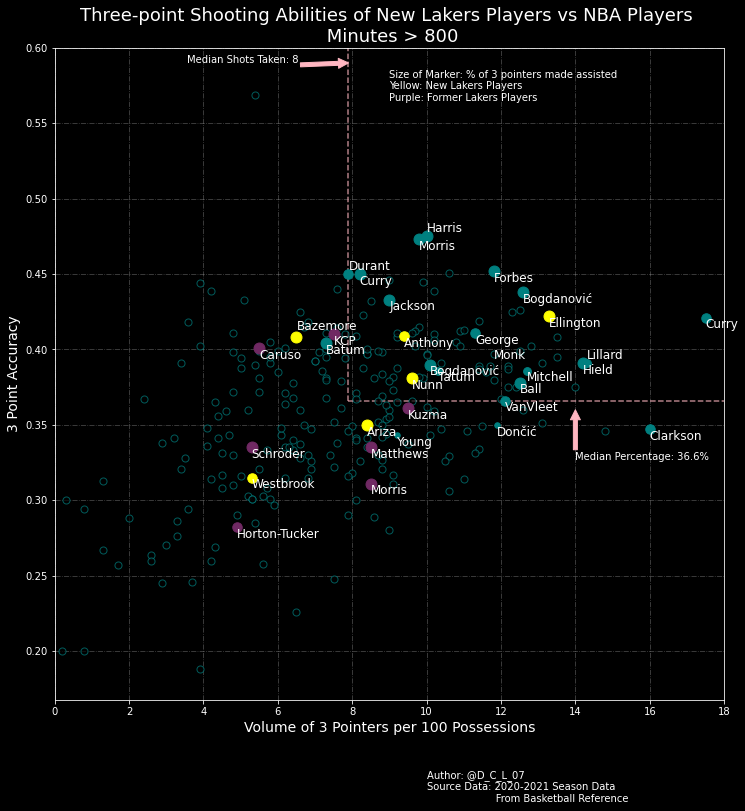

In [501]:
fig, ax = plt.subplots(figsize=(12,12), facecolor='black')
ax.set(facecolor='black')

players = df.player.tolist()
shortlist = ['Seth Curry', 'Stephen Curry', 'Bogdan Bogdanović', 'Bojan Bogdanović','Jordan Clarkson', 'Luka Dončić', 
             'Kevin Durant', 'Bryn Forbes', 'Paul George','Joe Harris', 'Buddy Hield', 
             'Reggie Jackson', 'Damian Lillard', 'Donovan Mitchell', 'Marcus Morris', 
            'Jayson Tatum', 'Fred VanVleet', 'Trae Young', 'Nicolas Batum', 'Lonzo Ball']

for i, label in enumerate(players):
    if label in lakers_new:
        ax.scatter(df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i], s=df['assisted 3s'].iloc[i], linewidth=1, color='#FFFF00', zorder=15, label='New Laker')
    elif label in lakers_old:
        ax.scatter(df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i], s=df['assisted 3s'].iloc[i], linewidth=1, color='#702963', zorder=15, label='Old Laker')
    elif label in shortlist:
        ax.scatter(df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i], s=df['assisted 3s'].iloc[i], linewidth=1, color='#008080', edgecolors='#008080', zorder=15)
    else:
        ax.scatter(df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i], s=50, linewidth=1, color='#000000', edgecolors='#008080', zorder=3, alpha=0.7)

for i, label in enumerate(players):
    if (label in lakers_new) or (label in lakers_old) or (label in shortlist):
        temp = label.split()
        if len(temp)==1:
            ax.annotate(temp[0], (df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i]-0.007), color='white', fontsize=12, zorder=15)
        elif len(temp) == 2:
            if label =='Kevin Durant' or label == 'Damian Lillard' or label == 'Joe Harris':
                ax.annotate(temp[1], (df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i]+0.003), xycoords='data', color='white', fontsize=12, zorder=15)
            elif label == 'Kentavious Caldwell-Pope':
                ax.annotate('KCP', (df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i]-0.007), xycoords='data', color='white', fontsize=12, zorder=15)
            elif label == 'Kent Bazemore':
                ax.annotate(temp[1], (df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i]+0.005), xycoords='data', color='white', fontsize=12, zorder=15)
            else:
                ax.annotate(temp[1], (df['fg3a_per_poss'].iloc[i], df['fg3_pct'].iloc[i]-0.007),  color='white', fontsize=12, zorder=15)

ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', labelsize=10, colors='white')
ax.tick_params(axis='y', labelsize=10, colors='white')
ax.set_title('Three-point Shooting Abilities of New Lakers Players vs NBA Players \n Minutes > 800', fontsize=18, color='white')
ax.set_xlabel('Volume of 3 Pointers per 100 Possessions', color='white', fontsize=14)
ax.set_ylabel('3 Point Accuracy', color='white', fontsize=14)
ax.text(10, 0.1, 'Author: @D_C_L_07 \nSource Data: 2020-2021 Season Data \n                      From Basketball Reference', fontsize=10, color='white')
ax.grid(alpha=0.4, zorder=0, ls='-.')
ax.hlines(y=df['fg3_pct'].median(),xmin=df['fg3a_per_poss'].median(), xmax=18, color='#FFB6C1', ls='dashed', alpha=0.7)
ax.vlines(x=df['fg3a_per_poss'].median(),ymin=df['fg3_pct'].median(), ymax=0.6, color='#FFB6C1', ls='dashed', alpha=0.7)
ax.set_xlim(left=0, right=18)
ax.set_ylim(top=0.6)
#ax.legend(['#FFFF00', '#702963'], labels=['Former', 'New'], loc=(0.05,-0.15))
ax.text(9, 0.565, 'Size of Marker: % of 3 pointers made assisted\nYellow: New Lakers Players\nPurple: Former Lakers Players', 
        color='white', fontsize=10)
ax.annotate('Median Percentage: 36.6%', 
            xy=(14,0.36), xycoords='data', 
            xytext=(0,-50),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, headlength=10, shrink=80, color='#FFB6C1'), color='white')
ax.annotate('Median Shots Taken: 8', xy=(7.9,0.59), xycoords='data', xytext=(-50,0), textcoords='offset points', ha='right',
           arrowprops=dict(headwidth=10, width=4, headlength=10, shrink=80, color='#FFB6C1'), color='white')
plt.show()
fig.savefig(fname='NBA.png', bbox_inches='tight', dpi=200, facecolor='black')



In [443]:
print(df['fg3_pct'].median())

0.366


In [444]:
print(df['fg3a_per_poss'].median())

7.9
